In [146]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
from matplotlib import pyplot

In [147]:
mainData = pd.read_csv("game_logs.csv")

In [148]:
mainData.shape

(171907, 161)

In [149]:
df = mainData[['date', 'day_of_week','v_game_number','h_game_number', 'v_score','h_score','day_night',
               'attendance','length_minutes']].copy()
df

,date,day_of_week,v_game_number,h_game_number,v_score,h_score,day_night,attendance,length_minutes
0,18710504,Thu,1,1,0,2,D,200.0,120.0
1,18710505,Fri,1,1,20,18,D,5000.0,145.0
2,18710506,Sat,2,1,12,4,D,1000.0,140.0
3,18710508,Mon,3,1,12,14,D,5000.0,150.0
4,18710509,Tue,2,1,9,5,D,3250.0,145.0
...,...,...,...,...,...,...,...,...,...
171902,20161002,Sun,162,162,6,4,D,27762.0,203.0
171903,20161002,Sun,162,162,2,5,D,36935.0,159.0
171904,20161002,Sun,162,162,1,7,D,41445.0,184.0
171905,20161002,Sun,162,162,4,10,D,44615.0,192.0


In [150]:
# change day/night to 1/0
df['day_night'] = df['day_night'].replace(['D','N'],[1,0])

In [151]:
df['day_of_week'] = df['day_of_week'].replace(['Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],[1,2,3,4,5,6,7])

In [152]:
# calculate which column is greater than the other then if the visiting team win v=1, if the home team win h=0
df['vist_win'] = np.where(
    df['v_score'] > df['h_score'], 1, 0)

In [153]:
win=df['vist_win'].value_counts()

<AxesSubplot:>

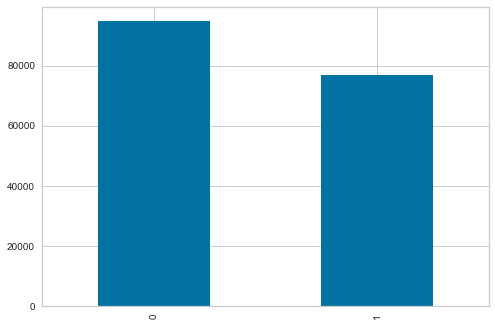

In [154]:
win.plot(kind='bar')

In [155]:
df = df.replace([' ','NULL','na','(none)'],np.nan)
df

,date,day_of_week,v_game_number,h_game_number,v_score,h_score,day_night,attendance,length_minutes,vist_win
0,18710504,5,1,1,0,2,1.0,200.0,120.0,0
1,18710505,6,1,1,20,18,1.0,5000.0,145.0,1
2,18710506,7,2,1,12,4,1.0,1000.0,140.0,1
3,18710508,2,3,1,12,14,1.0,5000.0,150.0,0
4,18710509,3,2,1,9,5,1.0,3250.0,145.0,1
...,...,...,...,...,...,...,...,...,...,...
171902,20161002,1,162,162,6,4,1.0,27762.0,203.0,1
171903,20161002,1,162,162,2,5,1.0,36935.0,159.0,0
171904,20161002,1,162,162,1,7,1.0,41445.0,184.0,0
171905,20161002,1,162,162,4,10,1.0,44615.0,192.0,0


In [156]:
# drop any NaNs
df_2 = df.dropna()

In [157]:
df_2.shape

(114648, 10)

In [158]:
df_2.dtypes

date                int64
day_of_week         int64
v_game_number       int64
h_game_number       int64
v_score             int64
h_score             int64
day_night         float64
attendance        float64
length_minutes    float64
vist_win            int32
dtype: object

In [159]:
#Segmenting dataset
df_3 = df_2[df_2["date"] > 19600411]
df_3

,date,day_of_week,v_game_number,h_game_number,v_score,h_score,day_night,attendance,length_minutes,vist_win
94311,19600412,3,1,1,4,9,1.0,30075.0,154.0,0
94312,19600412,3,1,1,2,3,0.0,67550.0,197.0,0
94313,19600412,3,1,1,3,4,1.0,39888.0,157.0,0
94314,19600412,3,1,1,1,3,1.0,42269.0,141.0,0
94315,19600413,4,2,2,4,0,0.0,24475.0,147.0,1
...,...,...,...,...,...,...,...,...,...,...
171902,20161002,1,162,162,6,4,1.0,27762.0,203.0,1
171903,20161002,1,162,162,2,5,1.0,36935.0,159.0,0
171904,20161002,1,162,162,1,7,1.0,41445.0,184.0,0
171905,20161002,1,162,162,4,10,1.0,44615.0,192.0,0


In [160]:
# drop date feature
df_3 = df_3.drop(['date', 'v_score', 'h_score'],axis=1)

In [161]:
df_3.dtypes

day_of_week         int64
v_game_number       int64
h_game_number       int64
day_night         float64
attendance        float64
length_minutes    float64
vist_win            int32
dtype: object

In [162]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77594 entries, 94311 to 171906
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day_of_week     77594 non-null  int64  
 1   v_game_number   77594 non-null  int64  
 2   h_game_number   77594 non-null  int64  
 3   day_night       77594 non-null  float64
 4   attendance      77594 non-null  float64
 5   length_minutes  77594 non-null  float64
 6   vist_win        77594 non-null  int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 4.4 MB


Modeling

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [164]:
#VS
from yellowbrick.classifier import classification_report, confusion_matrix, discrimination_threshold

In [165]:
scale= StandardScaler()

In [166]:
scale.fit(df_3)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [167]:
features = df_3[[
    'day_of_week','v_game_number','h_game_number'
    ,'attendance','length_minutes', 'day_night']]

target = df_3[['vist_win']].values.ravel()

In [168]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import FeatureImportances

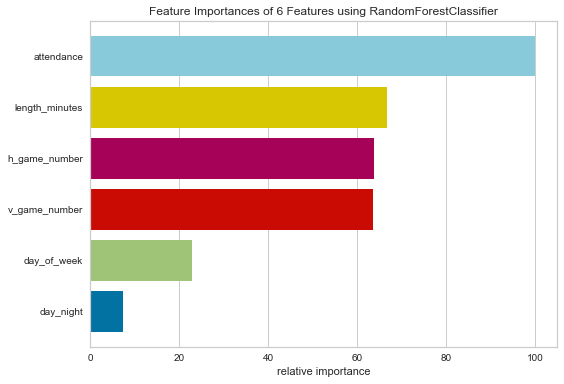

<AxesSubplot:title={'center':'Feature Importances of 6 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [169]:
# Load the classification data set

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(features, target)
viz.show()

In [170]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2
)

In [171]:
X_train.shape

(62075, 6)

In [172]:
y_train.shape

(62075,)

In [173]:
# Taking the best seven features and applying them to different ML models
cross_validate(GaussianNB(), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

{'fit_time': array([0.01548386, 0.01561284, 0.        , 0.0156548 , 0.03121042]),
 'score_time': array([0.01558566, 0.        , 0.015589  , 0.        , 0.        ]),
 'test_score': array([0.52150696, 0.51949551, 0.51538782, 0.51640914, 0.5175307 ])}

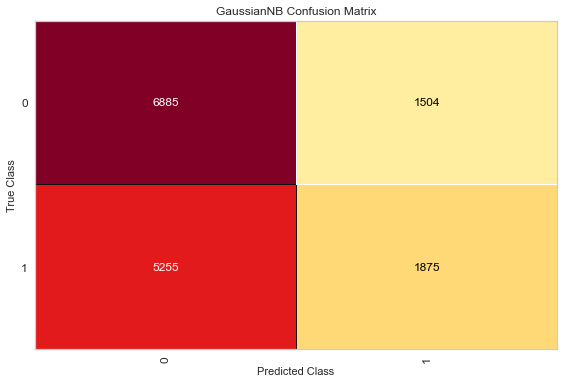

ConfusionMatrix(ax=<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=None,
                cmap=<matplotlib.colors.ListedColormap object at 0x0000018C44B846A0>,
                encoder=None,
                estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                fontsize=None, force_model=False, is_fitted=False,
                percent=False, sample_weight=None)

In [174]:
confusion_matrix(GaussianNB(), X_train, y_train, X_test, y_test, is_fitted=False)

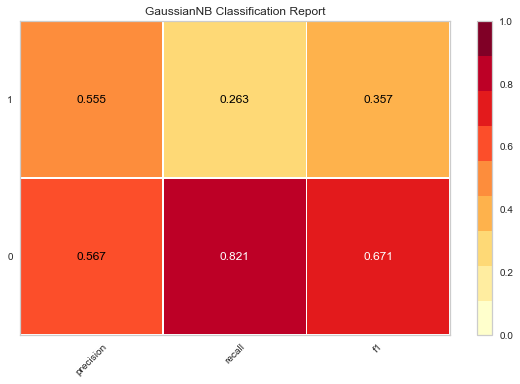

ClassificationReport(ax=<AxesSubplot:title={'center':'GaussianNB Classification Report'}>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x0000018C26CC59D0>,
                     encoder=None,
                     estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                     force_model=False, is_fitted=False, support=None)

In [175]:
classification_report(GaussianNB(), X_train, y_train, X_test, y_test,scoring='f1_macro', is_fitted=False)

In [176]:
#cross_validate(SVC(kernel='rbf', degree=3), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')
#confusion_matrix(SVC(kernel='rbf', degree=3), X_train, y_train, X_test, y_test, is_fitted=False)
#classification_report(SVC(kernel='rbf', degree=3), X_train, y_train, X_test, y_test,scoring='f1_macro', is_fitted=False)

In [177]:
cross_validate(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=TimeSeriesSplit(),
               scoring='f1_macro')

{'fit_time': array([0.06515861, 0.08377481, 0.10937834, 0.15529609, 0.23445559]),
 'score_time': array([0.52458572, 0.55317426, 0.55969095, 0.51594567, 0.49260545]),
 'test_score': array([0.51129218, 0.51660042, 0.51392317, 0.51942145, 0.5190068 ])}

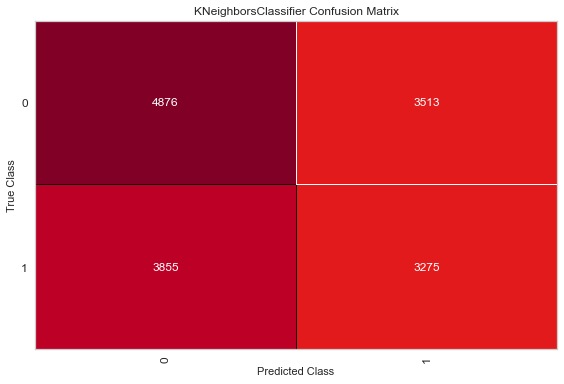

ConfusionMatrix(ax=<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=None,
                cmap=<matplotlib.colors.ListedColormap object at 0x0000018C26ABDE80>,
                encoder=None,
                estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                               metric='minkowski',
                                               metric_params=None, n_jobs=None,
                                               n_neighbors=5, p=2,
                                               weights='uniform'),
                fontsize=None, force_model=False, is_fitted=False,
                percent=False, sample_weight=None)

In [178]:
confusion_matrix(KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test, is_fitted=False)

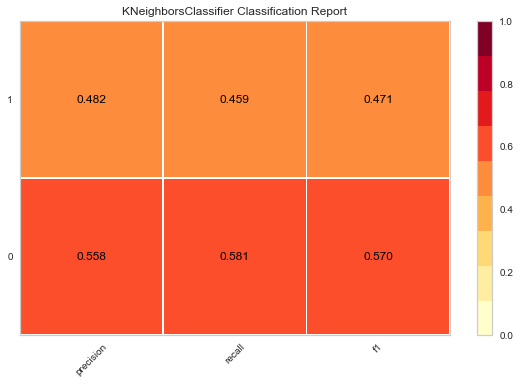

ClassificationReport(ax=<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x0000018C26147EE0>,
                     encoder=None,
                     estimator=KNeighborsClassifier(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=5,
                                                    p=2, weights='uniform'),
                     force_model=False, is_fitted=False, support=None)

In [179]:
classification_report(KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test,scoring='f1_macro', is_fitted=False)

In [180]:
cross_validate(LogisticRegression(), X_train, y_train, cv=TimeSeriesSplit(), scoring='f1_macro')

{'fit_time': array([0.13060212, 0.18273568, 0.16558027, 0.20844865, 0.23038793]),
 'score_time': array([0.01562452, 0.00997186, 0.0059588 , 0.00797343, 0.00797653]),
 'test_score': array([0.50865486, 0.50433932, 0.50224751, 0.49771858, 0.49396649])}

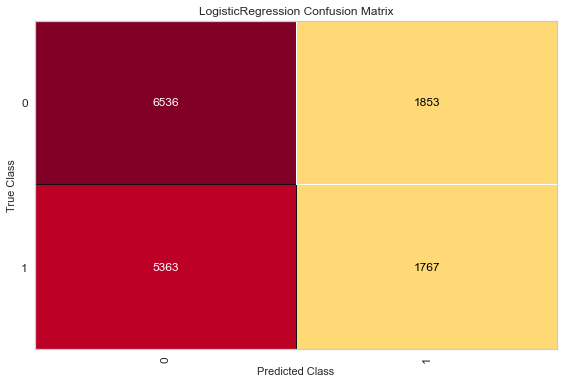

ConfusionMatrix(ax=<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>,
                classes=None,
                cmap=<matplotlib.colors.ListedColormap object at 0x0000018C26147610>,
                encoder=None,
                estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='lbfgs',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                fontsize=None, force_model=False, is_fitted=False,
                percent=False, sample_weight=None)

In [181]:
confusion_matrix(LogisticRegression(), X_train, y_train, X_test, y_test, is_fitted=False)

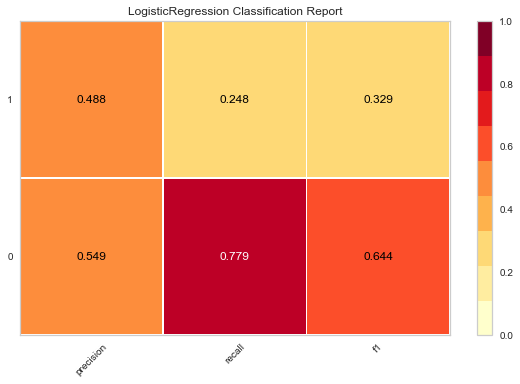

ClassificationReport(ax=<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x0000018C26B72520>,
                     encoder=None,
                     estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
        

In [182]:
classification_report(LogisticRegression(), X_train, y_train, X_test, y_test,scoring='f1_macro', is_fitted=False)

Run All Models

In [183]:
import warnings
warnings.filterwarnings('ignore')

In [184]:
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split as tts

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

In [185]:
features = features

In [194]:
target = df_3[['vist_win']].values.ravel()

In [203]:
XX = df_3.iloc[:, :-1].values
yy = df_3.iloc[:,-1].values

In [204]:
XX

array([[3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 3.0075e+04,
        1.5400e+02],
       [3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 6.7550e+04,
        1.9700e+02],
       [3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 3.9888e+04,
        1.5700e+02],
       ...,
       [1.0000e+00, 1.6200e+02, 1.6200e+02, 1.0000e+00, 4.1445e+04,
        1.8400e+02],
       [1.0000e+00, 1.6200e+02, 1.6200e+02, 1.0000e+00, 4.4615e+04,
        1.9200e+02],
       [1.0000e+00, 1.6100e+02, 1.6200e+02, 1.0000e+00, 2.8730e+04,
        2.1600e+02]])

In [205]:
yy

array([0, 0, 0, ..., 0, 0, 0])

In [206]:
df_3.head()

,day_of_week,v_game_number,h_game_number,day_night,attendance,length_minutes,vist_win
94311,3,1,1,1.0,30075.0,154.0,0
94312,3,1,1,0.0,67550.0,197.0,0
94313,3,1,1,1.0,39888.0,157.0,0
94314,3,1,1,1.0,42269.0,141.0,0
94315,4,2,2,0.0,24475.0,147.0,1


In [207]:
regressors = [
    SVR(),
    Lasso(),
    Ridge(),
    LinearSVR(),
    ElasticNet(),
    MLPRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

In [208]:
def score_model(XX, yy, estimator):
    """
    Split the data into train and test splits and evaluate the mode
    """
    XX_train, XX_test, yy_train, yy_test = tts(XX, yy)
   
    estimator.fit(XX_train, yy_train)
    yy_pred = estimator.predict(XX_test)
    print("{}: {}".format(estimator.__class__.__name__, r2_score(yy_test, yy_pred)))

In [209]:
for regressor in regressors:
    score_model(XX, yy, regressor)

SVR: -0.5133746783485524
Lasso: 0.016031885420300096
Ridge: 0.022530699610258886
LinearSVR: -2.53935072624995
ElasticNet: 0.021589853835687567
MLPRegressor: -2.360359853704875
KNeighborsRegressor: -0.16569858405439053
DecisionTreeRegressor: -0.9845486258732465
RandomForestRegressor: -0.05498940476802927
